## Implementación de un dataset a un conjunto de datos sobre Aerolineas.

### Importamos las Bibliotecas.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lalo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Leemos los datos del archivo

In [28]:
data = pd.read_csv("train.csv")

### Obtenemos una primera vista de los datos.

In [29]:
data.shape
#tamaño del dataset
#izquierda datos, derecha columnas

(103904, 25)

### Información general sobre el data set.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Columnas del dataset

In [31]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Tipo de dato de las columnas que integran el dataset

In [32]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

### Resumen estadistico del dataset

In [33]:
data.describe()
#datos estadisticos
#conteo
#media
#desviación estándar
#valor mínimo
#porcentajes del 25,50,75 el 50 es la mediana
#valor máximo

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Visualización de las primeras 5 filas

In [34]:
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Visualización de las ultimas 5 filas

In [35]:
data.tail(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


### Visualizar celdas de forma aleatoria.

In [36]:
data.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
30749,30749,76775,Male,disloyal Customer,21,Business travel,Eco,689,1,1,...,4,4,1,3,2,3,4,11,18.0,neutral or dissatisfied
27467,27467,64960,Female,Loyal Customer,50,Business travel,Eco,151,4,2,...,4,4,4,4,3,4,5,13,0.0,satisfied
1224,1224,114100,Male,disloyal Customer,35,Business travel,Eco Plus,1947,2,2,...,5,4,5,4,3,3,5,8,13.0,neutral or dissatisfied
63685,63685,120796,Female,Loyal Customer,39,Business travel,Business,2890,4,4,...,4,4,4,4,3,4,3,0,0.0,satisfied
20670,20670,68434,Male,disloyal Customer,25,Business travel,Eco,1045,3,2,...,5,2,2,3,1,4,5,0,0.0,neutral or dissatisfied


In [37]:
data = pd.read_csv("train.csv")

### Ordenamos el dataset

In [41]:
data.sort_values('id')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,90131,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,47865,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,44425,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,96450,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,72524,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,97767,129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
53459,53459,129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
32973,32973,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
82052,82052,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


In [40]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

### Seleccionamos y filtramos

In [42]:
data[['Type of Travel','Age']].sample(10)

,Type of Travel,Age
79316,Business travel,39
99660,Personal Travel,64
90488,Business travel,39
79437,Business travel,42
1258,Business travel,51
57190,Personal Travel,19
101573,Business travel,59
59163,Business travel,51
1868,Personal Travel,29
45515,Personal Travel,38


### Verificamos si hay duplicados

In [43]:
data.duplicated().sum(axis=0)

0

### Verificamos si existen valores faltantes

In [44]:
data.isnull().sum(axis=0)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### Graficos 

### Gráfico de Histogramas

Mostramos la distribución de una cada una de las variables dentro de el data set. 

El eje x representa los valores de la variable numérica.

El eje y representa la frecuencia o el número de observaciones de cada intervalo.

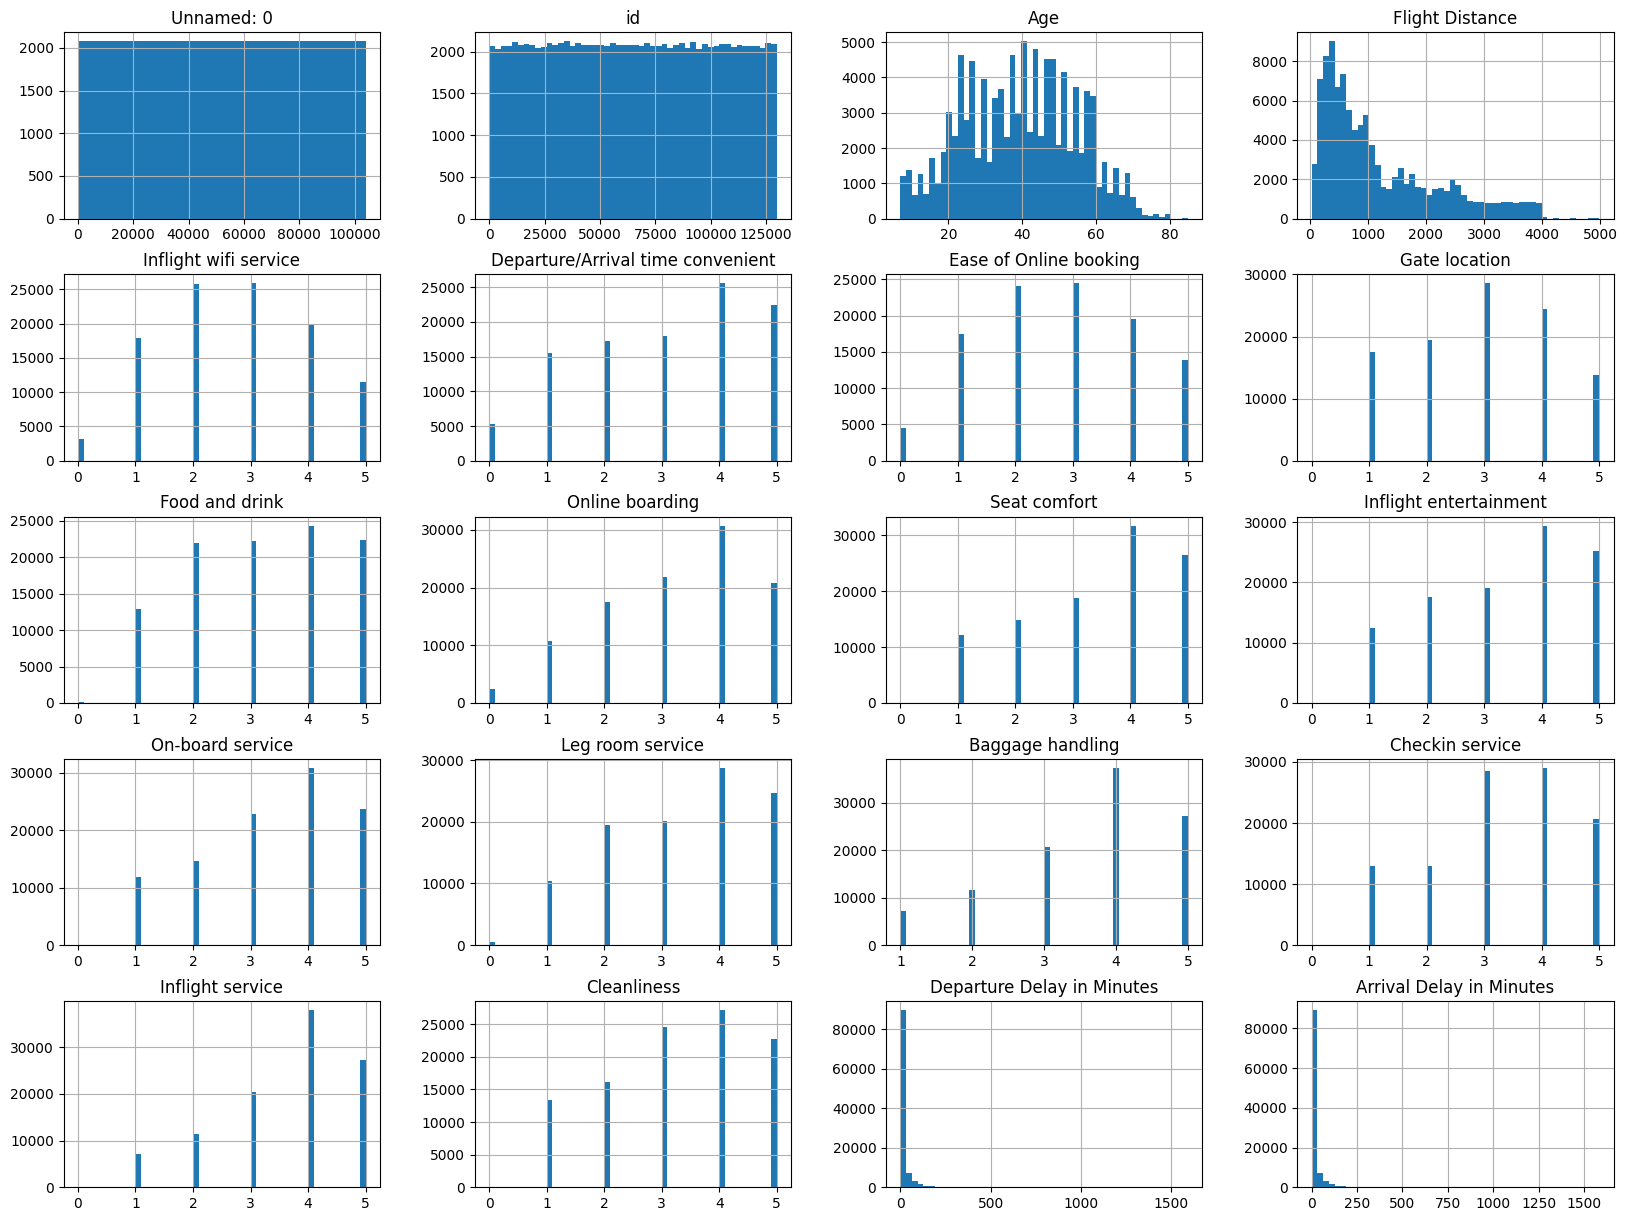

In [45]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Gráfico de caja (boxplot)
El eje x representa las categorías o grupos que se están comparando, para este caso, el género.

El eje y representa la variable numérica que se está analizando, para este caso, es la edad de los pasajeros.



En este gráfico de caja, se pueden compara las distribuciones de edad entre hombres y mujeres

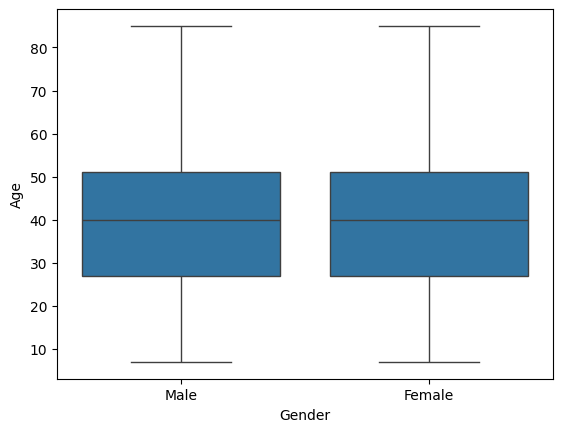

In [46]:
sns.boxplot(x='Gender', y='Age', data=data)
plt.show()

### Ejemplo de la distribución de las variables numéricas en nuestro dataset.

### Utilizando histogramas.

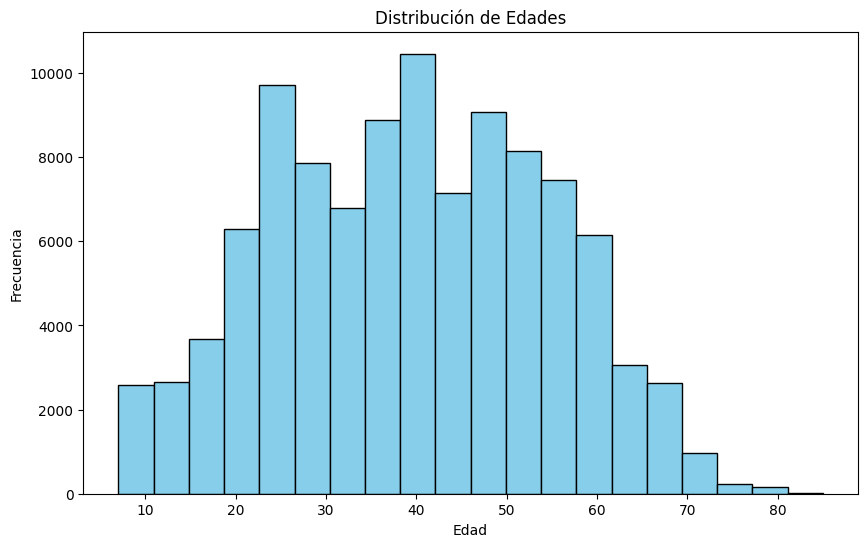

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue',edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Mapa de calor para visualizar las relaciones de correlación entre las variables numéricas en el dataset.

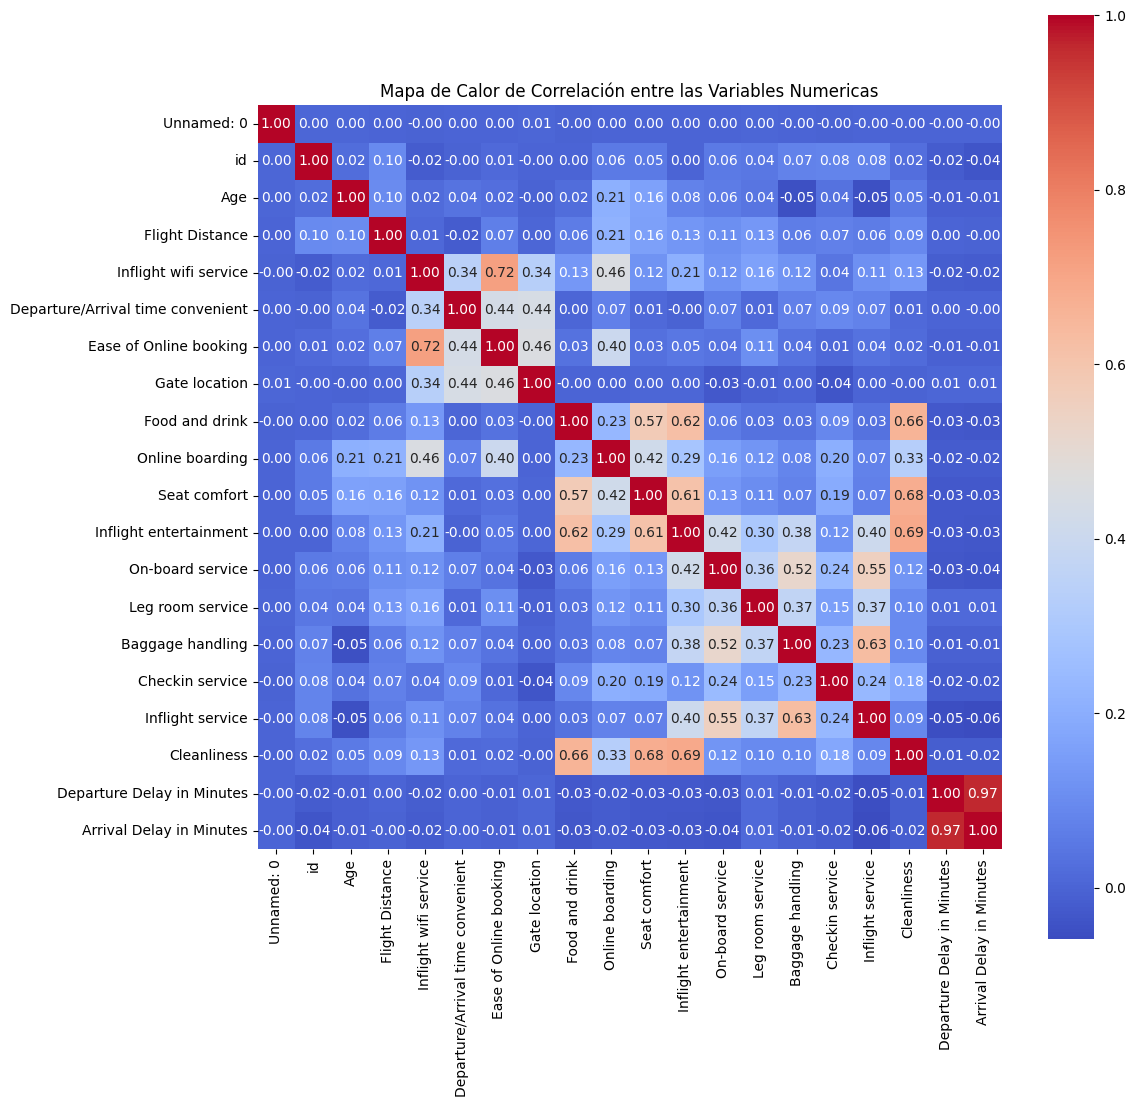

In [48]:
#Tuvimos un error en calcular la matriz de correlacion porque
#algunas columnas de nuestro dataset contienen valores de tipo string

#con esto vamos a seleccionar solo las columnas de tipo de dato float, int
#para que calcule la matriz de correlacion entre las variables numericas
tipo_numerico = data.select_dtypes(include=['float64', 'int64']) 

#Calcular la matriz de correlación entre las variables numéricas
matriz_correlacion = tipo_numerico.corr()

#Creamos el mapa de calor de la matriz de correlación
plt.figure(figsize=(12,12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Calor de Correlación entre las Variables Numericas')
plt.show()

### Comparación de grupos

### Satisfacción de Cliente por tipo de Cliente

In [49]:
satisfaccion_por_grupos = pd.crosstab(index=data['Customer Type'], columns=data['satisfaction'])
print(satisfaccion_por_grupos)

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492


#### En este ejemplo vamos a comparar la satisfacción del cliente entre los diferentes tipos de clientes. Vamos a utilizar una tabla de frecuencias y un grafio de barras (La tabla de frecuencias está en la celda de arriba de este texto)


#### La tabla de frecuencias muestra la cantidad de clientes satisfechos y no satisfechos en cada tipo de cliente.

#### En el gráfico de barras se visualiza la información de una manera más intuitiva.

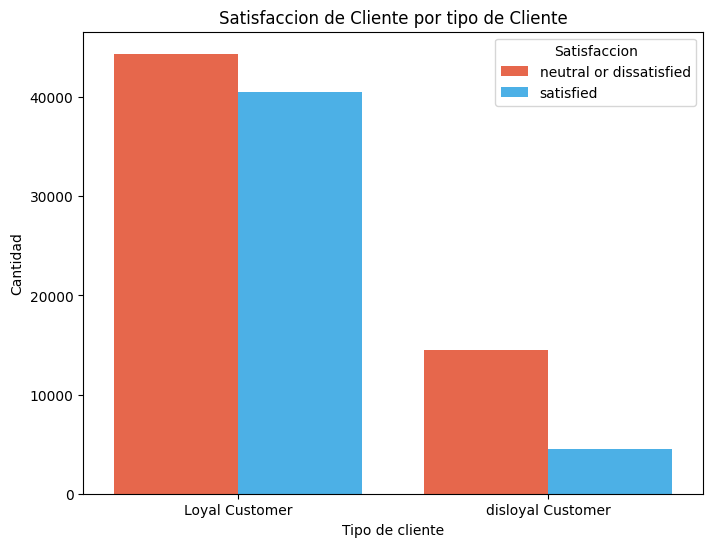

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Customer Type', hue='satisfaction', palette=['#FF5733', '#33B8FF'])
plt.title('Satisfaccion de Cliente por tipo de Cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad')
plt.legend(title='Satisfaccion', loc='upper right')
plt.show()

### Satisfacción cliente por el tipo de viaje

#### En este punto vamos a utilizar la funcion groupby() para agrupar los datos por el tipo de viaje (Type of Travel/Tipo de Viaje), para después calcular la frecaencia de satisfacción en cada grupo.

In [51]:
satisfaccion_tipo_viaje= data.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack()
print(satisfaccion_tipo_viaje)

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                 0.417403   0.582597
Personal Travel                 0.898322   0.101678


#### En este gráfico de barras nos ayudará a entender cómo la satisfacción del cliente varía entre los diferentes tipos de viaje, proporcionandonos información sobre las preferencias y experiencias de los pasajeros según el propósito  del viaje

<Figure size 800x600 with 0 Axes>

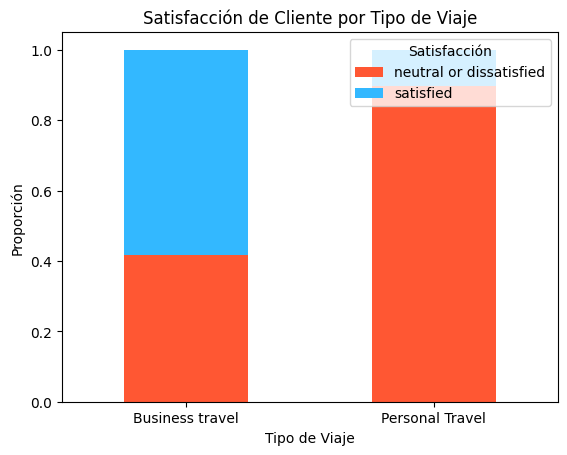

In [52]:
plt.figure(figsize=(8, 6))
satisfaccion_tipo_viaje.plot(kind='bar', stacked=True, color=['#FF5733', '#33B8FF'])
plt.title('Satisfacción de Cliente por Tipo de Viaje')
plt.xlabel('Tipo de Viaje')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Satisfacción', loc='upper right')
plt.show()

### Comparación por servicios a bordo

In [53]:
servicios = ['Food and drink']  # Agrega más servicios según sea necesario
satisfaccion_servicios = data.groupby(servicios)['satisfaction'].value_counts(normalize=True).unstack()
print(satisfaccion_servicios)

satisfaction    neutral or dissatisfied  satisfied
Food and drink                                    
0                              0.532710   0.467290
1                              0.799953   0.200047
2                              0.612061   0.387939
3                              0.603632   0.396368
4                              0.475019   0.524981
5                              0.450993   0.549007


#### Este gráfico de barras apilado nos proporciona una visión clara de como la sitisfacion del cliente varia en función de los diferentes servicios ofrecidos que para este caso será el servicio Food and drink (Bebidas y comida).

<Figure size 1000x1000 with 0 Axes>

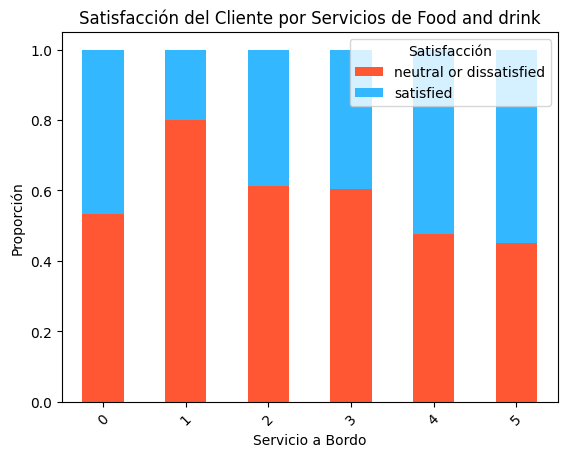

In [54]:
plt.figure(figsize=(10, 10))
satisfaccion_servicios.plot(kind='bar', stacked=True, color=['#FF5733', '#33B8FF'])
plt.title('Satisfacción del Cliente por Servicios de Food and drink')
plt.xlabel('Servicio a Bordo')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Satisfacción', loc='upper right')
plt.show()

In [55]:
servicios = ['Inflight entertainment']  # Agrega más servicios según sea necesario
satisfaccion_servicios1 = data.groupby(servicios)['satisfaction'].value_counts(normalize=True).unstack()
print(satisfaccion_servicios1)

satisfaction            neutral or dissatisfied  satisfied
Inflight entertainment                                    
0                                      1.000000        NaN
1                                      0.860154   0.139846
2                                      0.786698   0.213302
3                                      0.729923   0.270077
4                                      0.388234   0.611766
5                                      0.351565   0.648435


#### De la misma manera que la celda anterior, Este gráfico de barras apilado nos proporciona una visión clara de como la satisfacción del cliente varía en función de los diferentes servicios ofrecidos que para este caso cambiamos el servicio a Inflight entertainment().

<Figure size 1000x1000 with 0 Axes>

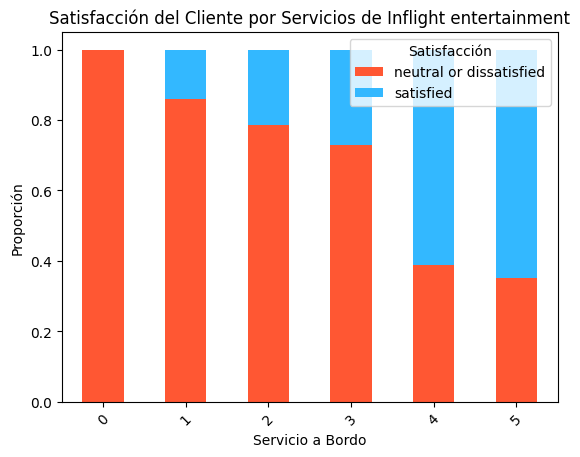

In [56]:
plt.figure(figsize=(10, 10))
satisfaccion_servicios1.plot(kind='bar', stacked=True, color=['#FF5733', '#33B8FF'])
plt.title('Satisfacción del Cliente por Servicios de Inflight entertainment')
plt.xlabel('Servicio a Bordo')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Satisfacción', loc='upper right')
plt.show()

### Grafico de Histograma

#### Visualización de las variables numéricas en el dataset, como la edad, el tiempo de retraso y más.

##### En este código seleccionamos las variables que son de tipo numérico.
##### Este código genera un gráfico de histograma para cada una de las variables numéricas que seleccionamos, lo que nos dejara visualizar la distribución de cada variable para el conjunto de datos.

<function matplotlib.pyplot.show(close=None, block=None)>

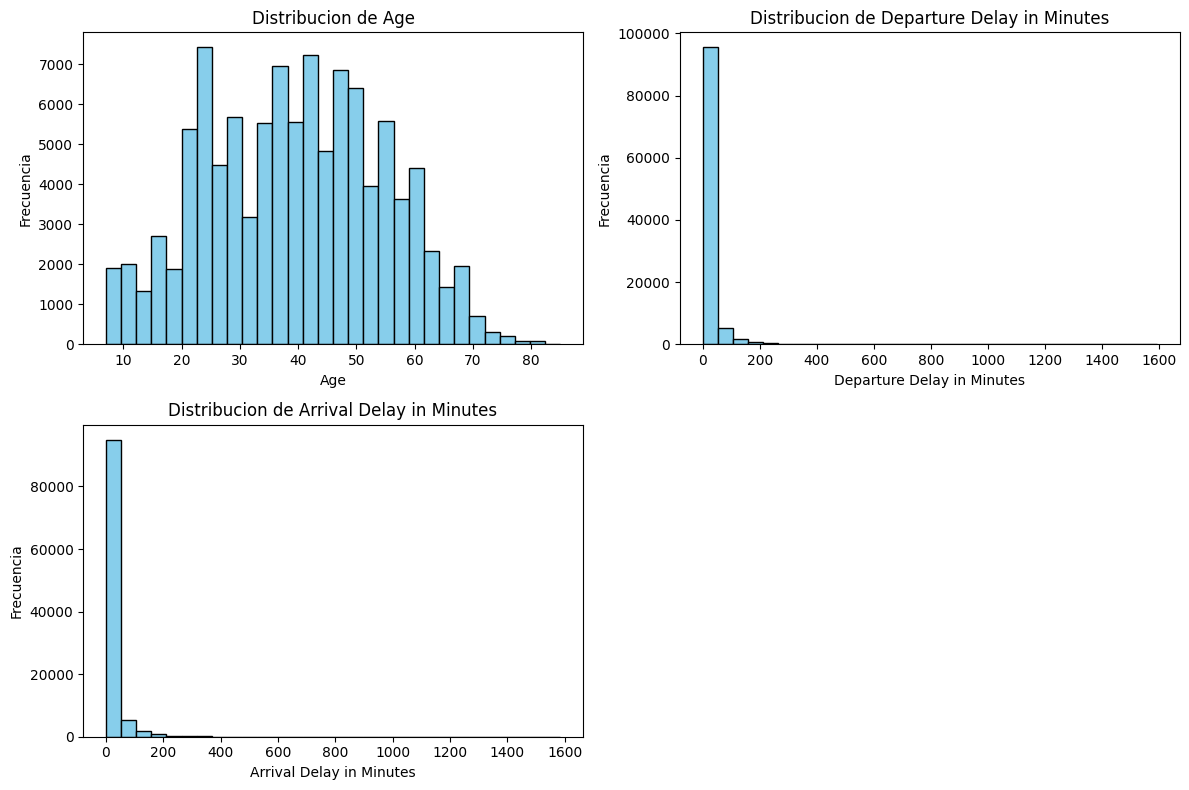

In [57]:
variables_numericas = ['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(12, 8))

for i, var in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribucion de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show

#### Relación entre los diferentes servicios a bordo

In [58]:
nuevo_data = data[['satisfaction', 'Inflight service', 'Checkin service', 'On-board service','Leg room service' ]]
nuevo_data_1 = data[['Gender', 'Inflight service', 'Checkin service', 'On-board service','Leg room service' ]] 

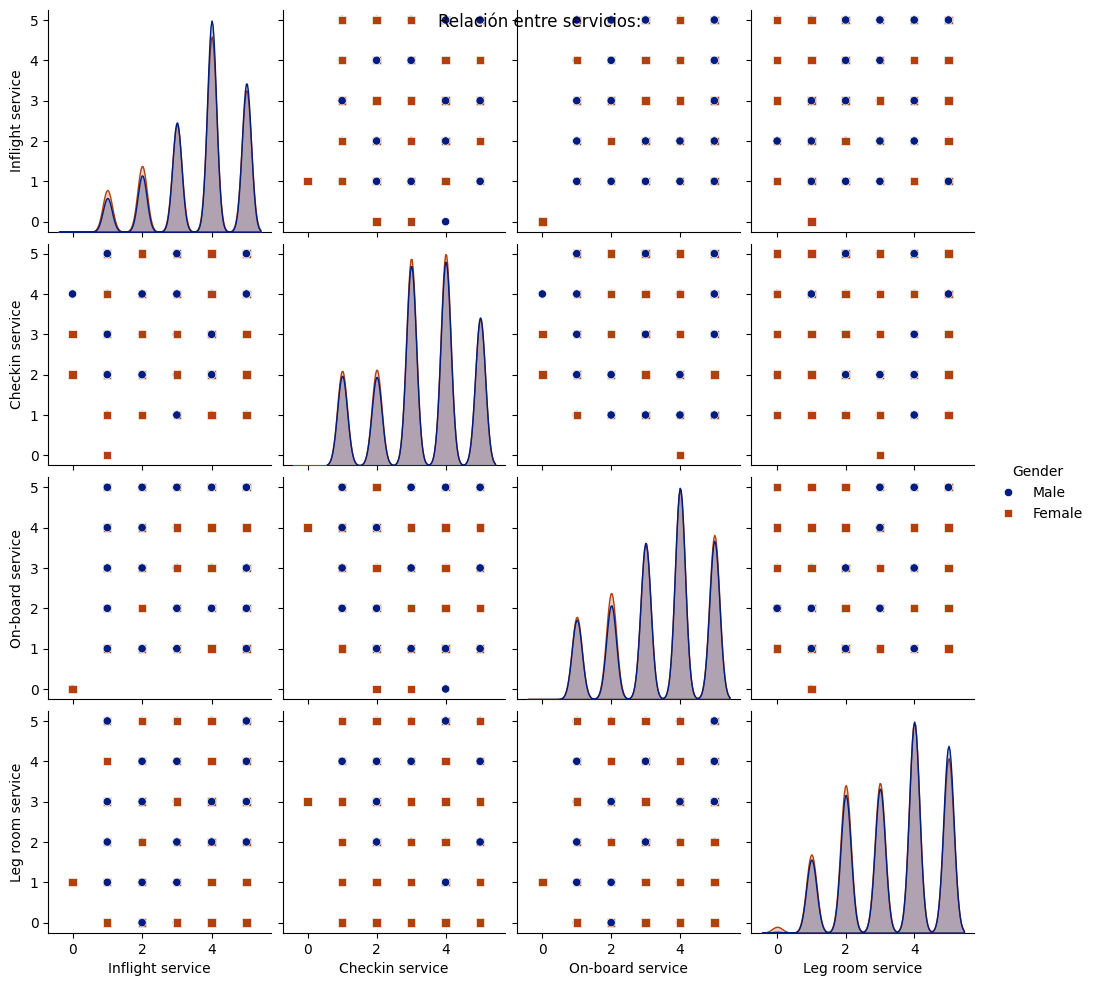

In [59]:
columnas_relacionadas = ['satisfaction','Inflight service', 'Checkin service']
sns.pairplot(data=nuevo_data_1, hue='Gender', markers=['o', 's'], palette='dark')
plt.suptitle('Relación entre servicios: ')
plt.show()

### Graficos de Dispersión (Scatter Plot)

### En ese Gráfico de dispersión nos permitirá ver si hay alguna relación entre la edad de los clientes y el tiempo de retraso en la salida de los vuelos.
### Si los puntos se agrupan en ciertas áreas o si hay una tendencia visible, podría indicar una relación entre estas dos variables. Además, al ajustar los parámetros dela gráfico, como el tamaño de los puntos, podemos obtener una mejor comprensión de la distribución de los datos.

#### Otras Relaciones que se pueden hacer para este tipo de grafico:
1. Distancia entre vuelo vs Tiempo de retraso en la salida.
2. Clase de vueli vs Tiempo de retraso en la salida.
3. Calidad de servicio a bordo vs Satisfaccion del cliente.
4. Tiempo de retraso en la salida vs Tiempo de retraso en la llegada. 

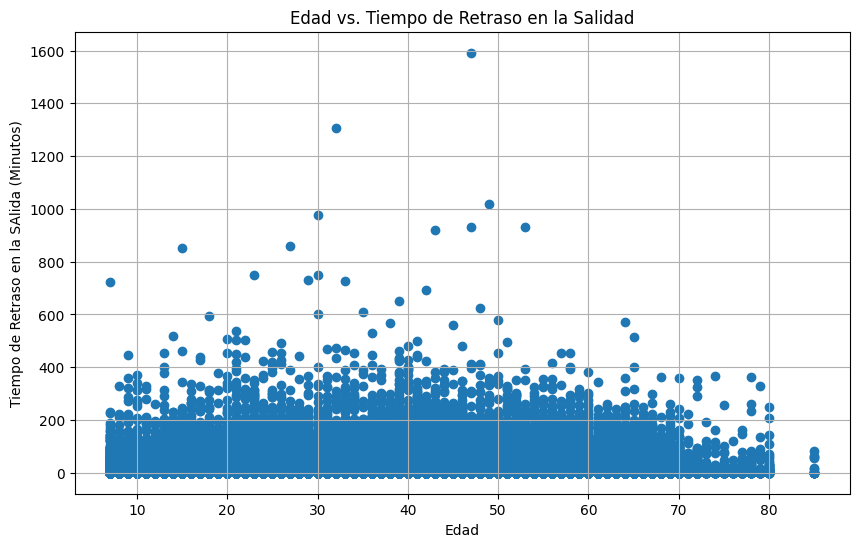

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'], data['Departure Delay in Minutes'], alpha=1)
plt.title('Edad vs. Tiempo de Retraso en la Salidad')
plt.xlabel('Edad')
plt.ylabel('Tiempo de Retraso en la SAlida (Minutos)')
plt.grid(True)
plt.show()

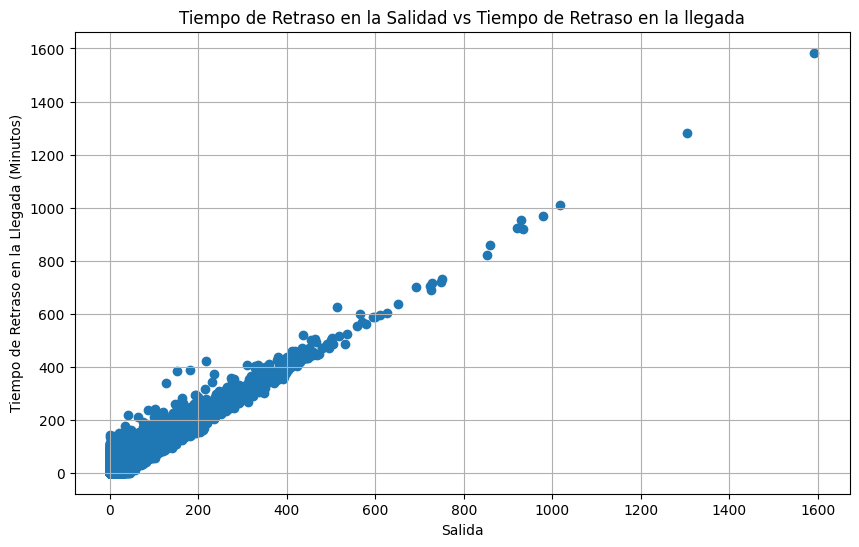

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(data['Departure Delay in Minutes'], data['Arrival Delay in Minutes'], alpha=1)
plt.title('Tiempo de Retraso en la Salidad vs Tiempo de Retraso en la llegada')
plt.xlabel('Salida')
plt.ylabel('Tiempo de Retraso en la Llegada (Minutos)')
plt.grid(True)
plt.show()

### Grafico de Pastel

In [62]:
satisfaccion_distribucion = data['satisfaction'].value_counts()
print(satisfaccion_distribucion)

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


### Este código genera un gráfico de pastel que muestra la distribución de la satisfacción de los clientes en porcentajes.
### Cada sector del pastel representa el porcentaje de clientes que están satisfechos o insatisfechos.

### Esto nos proporciona una visualización rápida y clara de como se distribuye la satisfacción entre los clientes de la aerolínea de nuestro dataset.

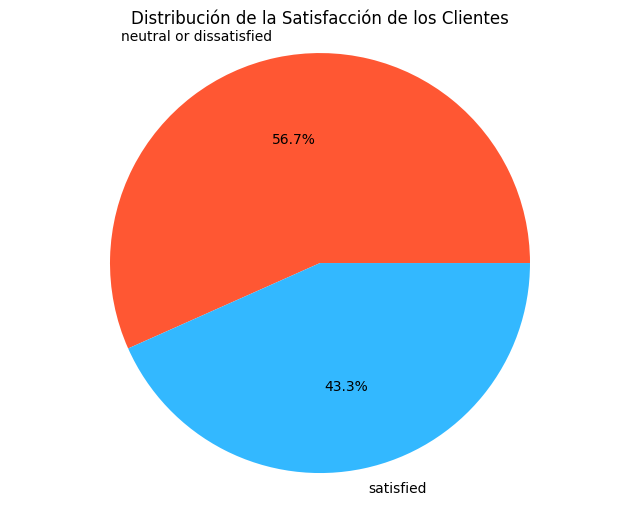

In [63]:
plt.figure(figsize=(8,6))
plt.pie(satisfaccion_distribucion, labels=satisfaccion_distribucion.index, autopct='%1.1f%%', colors=['#FF5733', '#33B8FF'])
plt.title('Distribución de la Satisfacción de los Clientes')
plt.axis('equal')  # Para que el gráfico de pastel sea circular
plt.show()

### Regresión Logística

#### Vamos a predecir la satisfacción del cliente en función de las características del viaje utilizando la regresión logística

1. Primero vamos a preparar los datos, para este caso vamos a seleccionar los datos relevantes como son los servicios ofrecidos así como también una variable objetiva que para este caso será la satisfacción del cliente.
2. Vamos a dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento lo vamos a utilizar para entrenar el modelo, y el conjunto de prueba para evaluar el rendimiento.

3. Para estos casos ya vamos a hacer uso de la biblioteca Scikit-learn, que es una librería en Python para el aprendizaje automático y tiene muchas funciones integradas para realizar tareas comunes de clasificación o regresión que para este caso será un modelo de regresión logística en el conjunto del entrenamiento.

4. Vamos a evaluar el rendimiento del modelo utilizando en conjunto de prueba.

5. Vamos a examinar los coeficientes del modelo para comprender como cada característica del viaje contribuye a la satisfacción del cliente.



##### Este segmento de código primero se seleccionan los datos relevantes del viaje, en este caso algunos de los servicios y la variable objetivo que es la satisfacción. Después se divide los datos en conjuntos de entrenamiento y prueba. 
##### Vamos a ocupar un modelo de regresión logística (LogisticRegression()) al conjunto de entrenamiento y evalúa su rendimiento en el conjunto de prueba.

##### Ya para terminar se muestran las métricas de evaluación del modelo y los coeficientes del modelo para interpretar los resultados.

In [64]:
datos=['Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Seat comfort'] #Podemos agregar todos los servicios
X = data[datos]
y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
print("Modelo entrenado")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy', accuracy )
print('Reporte de Clasificacion: ')
print(classification_report(y_test, y_pred))
print('Matriz de confusion: ')
print(confusion_matrix(y_test, y_pred))

coeficientes =  pd.DataFrame(data={'Feature':datos, 'Coefficient': model.coef_[0]})
print('Coeficientes')
print(coeficientes)

Modelo entrenado
Accuracy 0.7337952937779703
Reporte de Clasificacion: 
                         precision    recall  f1-score   support

neutral or dissatisfied       0.75      0.80      0.77     11713
              satisfied       0.71      0.65      0.68      9068

               accuracy                           0.73     20781
              macro avg       0.73      0.72      0.73     20781
           weighted avg       0.73      0.73      0.73     20781

Matriz de confusion: 
[[9367 2346]
 [3186 5882]]
Coeficientes
                  Feature  Coefficient
0         Flight Distance     0.000667
1   Inflight wifi service     0.583467
2  Ease of Online booking    -0.127822
3            Seat comfort     0.548910


### Interpretación de los resultados para LogisticRegression

1. Accuracy:
    - La precisión del modelo es del 73.38%, lo que significa que aproximadamente el 73.38% de las predicciones realizadas por el modelo son correctas.
2. Reporte de Clasificacion:
   - Proporciona una evaluación detallada del rendimiento del modelo para cada clase en el problema de clasificación.
   -Para cada clase, se proporcionan métricas como precisión, recall (tasa de verdaderos positivos), f1-score (una medida ponderada de precisión y recall) y el soporte (número de muestras verdaderas para cada clase).
   - Para la clase "neutral or dissatisfied", el modelo tiene una precisión del 75%, recall del 80% y un f1-score del 77%. Esto significa que el 75% de las predicciones positivas para esta clase son correctas, el modelo identificó correctamente el 80% de todas las muestras de esta clase y el valor f1 es del 77%.
   - De manera similar, para la clase "satisfied", el modelo tiene una precisión del 71%, recall del 65% y un f1-score del 68%.
3. Matriz de confusion:
   - La matriz de confusión muestra el desempeño del modelo en términos de predicciones correctas e incorrectas.
   - La primera fila de la matriz corresponde a la clase "neutral or dissatisfied", y la segunda fila corresponde a la clase "satisfied".
   - En la matriz, los elementos diagonales representan las predicciones correctas para cada clase, mientras que los elementos fuera de la diagonal representan las predicciones incorrectas.
   - El modelo predijo correctamente 9367 muestras como "neutral or dissatisfied" y 5882 muestras como "satisfied". Sin embargo,  también hizo predicciones incorrectas, clasificando erróneamente 3186 muestras de "satisfied" como "neutral or dissatisfied" y 2346 muestras de "neutral or dissatisfied" como "satisfied".
4. Coeficientes:
   - Se proporcionan los coeficientes de algunas características del modelo.
   - Cada coeficiente indica la importancia relativa de una característica para la predicción del modelo.
   - La característica "Inflight wifi service" tiene un coeficiente positivo de 0.583467, lo que sugiere que tiene un impacto positivo en la predicción de la satisfacción del cliente. Por otro lado, la característica "Ease of Online booking" tiene un coeficiente negativo de -0.127822, lo que sugiere que tiene un impacto negativo en la predicción de la satisfacción del cliente.

### Clasificación con algoritmos Random Forest o Gradient Boosting

### Hemos seleccionado las características relevantes del viaje (features) y dividido los datos en características (X) y la variable objetivo (y).
### Luego, dividimos los datos en conjuntos de entrenamiento y prueba.
### Entrenamos dos modelos diferentes: uno utilizando Random Forest y otro utilizando Gradient Boosting.
### Evaluamos el rendimiento de cada modelo utilizando el conjunto de prueba, mostrando la precisión, el informe de clasificación y la matriz de confusión.

In [65]:
variables = ['Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Seat comfort']
X = data[variables]
Y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
rf_y_pred = rf_model.predict(X_test)
rf_aacuracy = accuracy_score(y_test, rf_y_pred)

rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))


Random Forest Accuracy: 0.7937057889418219

Random Forest Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.80      0.84      0.82     11713
              satisfied       0.78      0.74      0.76      9068

               accuracy                           0.79     20781
              macro avg       0.79      0.79      0.79     20781
           weighted avg       0.79      0.79      0.79     20781


Random Forest Confusion Matrix:
[[9827 1886]
 [2401 6667]]


### Interpretación de los Resultados para Random Forest

1. Random Forest Accuracy:
   - La precisión del modelo Random Forest es del 79.37%, lo que significa que aproximadamente el 79.37% de las predicciones realizadas por el modelo son correctas.
2. Random Forest Classification Report: 
   - El informe de clasificación proporciona una evaluación detallada del rendimiento del modelo para cada clase en el problema de clasificación.
   - Para cada clase, se proporcionan métricas como precisión, recall (tasa de verdaderos positivos), f1-score (una medida ponderada de precisión y recall) y el soporte (número de muestras verdaderas para cada clase).
   -Para la clase "neutral or dissatisfied", el modelo tiene una precisión del 80%, recall del 84% y un f1-score del 82%. Esto significa que el 80% de las predicciones positivas para esta clase son correctas, el modelo identificó correctamente el 84% de todas las muestras de esta clase y el valor f1 es del 82%.
   - De manera similar, para la clase "satisfied", el modelo tiene una precisión del 78%, recall del 74% y un f1-score del 76%.
3. Random Forest Confusion Matrix:
   - La matriz de confusión es una tabla que muestra el desempeño del modelo en términos de predicciones correctas e incorrectas.
   - La primera fila de la matriz corresponde a la clase "neutral or dissatisfied", y la segunda fila corresponde a la clase "satisfied".
   - En la matriz, los elementos diagonales representan las predicciones correctas para cada clase, mientras que los elementos fuera de la diagonal representan las predicciones incorrectas.
   - El modelo predijo correctamente 9827 muestras como "neutral or dissatisfied" y 6667 muestras como "satisfied". Sin embargo, también hizo predicciones incorrectas, clasificando erróneamente 2401 muestras de "satisfied" como "neutral or dissatisfied" y 1886 muestras de "neutral or dissatisfied" como "satisfied".
   

In [67]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("\nGradient Boosting Accuracy:", gb_accuracy)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))
print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))


Gradient Boosting Accuracy: 0.8245993936769164

Gradient Boosting Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.82      0.88      0.85     11713
              satisfied       0.83      0.76      0.79      9068

               accuracy                           0.82     20781
              macro avg       0.82      0.82      0.82     20781
           weighted avg       0.82      0.82      0.82     20781


Gradient Boosting Confusion Matrix:
[[10265  1448]
 [ 2197  6871]]


### Interpretación de los resultados para Gradient Boosting

1. Gradient Boosting Accuracy:
   - La precisión del modelo Gradient Boosting es del 82.46%, lo que significa que aproximadamente el 82.46% de las predicciones realizadas por el modelo son correctas.
2. Gradient Boosting Classification Report:
   - El informe de clasificación proporciona una evaluación detallada del rendimiento del modelo para cada clase en el problema de clasificación.
   - Para cada clase, se proporcionan métricas como precisión, recall (tasa de verdaderos positivos), f1-score (una medida ponderada de precisión y recall) y el soporte (número de muestras verdaderas para cada clase).
   - Para la clase "neutral or dissatisfied", el modelo tiene una precisión del 82%, recall del 88% y un f1-score del 85%. Esto significa que el 82% de las predicciones positivas para esta clase son correctas, el modelo identificó correctamente el 88% de todas las muestras de esta clase y el valor f1 es del 85%.
   - De manera similar, para la clase "satisfied", el modelo tiene una precisión del 83%, recall del 76% y un f1-score del 79%.
3. Gradient Boosting Confusion Matrix:
   - La matriz de confusión es una tabla que muestra el desempeño del modelo en términos de predicciones correctas e incorrectas.
   - La primera fila de la matriz corresponde a la clase "neutral or dissatisfied", y la segunda fila corresponde a la clase "satisfied".
   - En la matriz, los elementos diagonales representan las predicciones correctas para cada clase, mientras que los elementos fuera de la diagonal representan las predicciones incorrectas.
   - El modelo predijo correctamente 10265 muestras como "neutral or dissatisfied" y 6871 muestras como "satisfied". Sin embargo, también hizo predicciones incorrectas, clasificando erróneamente 2197 muestras de "satisfied" como "neutral or dissatisfied" y 1448 muestras de "neutral or dissatisfied" como "satisfied".

### Analisis con Procesamiento de Lenguaje Natural (NLP)

### Hemos reprocesado los comentarios de los clientes utilizando técnicas como tokenización, eliminación de stop words y lematización.
### Utilizamos TF-IDF para convertir los comentarios reprocesados en características numéricas.

### Dividimos los datos en conjuntos de entrenamiento y prueba.

### Entrenamos un modelo de clasificación (en este caso, un clasificador de bosques aleatorios).

### Evaluamos el rendimiento del modelo utilizando métricas como la precisión, el informe de clasificación y la matriz de confusión.

In [68]:
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Unir tokens nuevamente en texto
    text = ' '.join(tokens)
    return text

In [69]:
X = data['Customer Type']
y = data['satisfaction']

X = X.apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Selecciona el número máximo de características
X = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.5636398633367018

Classification Report:


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

neutral or dissatisfied       0.56      1.00      0.72     11713
              satisfied       0.00      0.00      0.00      9068

               accuracy                           0.56     20781
              macro avg       0.28      0.50      0.36     20781
           weighted avg       0.32      0.56      0.41     20781


Confusion Matrix:
[[11713     0]
 [ 9068     0]]


c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Como Prueba.
### Vamos a modificar el dataset,vamos a cambiar de idioma las columnas, en este caso a español, para los que no sabemos ingles XD

### El dataset lo podemos ocupar ya sea en español o en ingles

In [71]:
# Cambiar los nombres de las columnas al español
data.columns = ['AutoID','ID', 'Género', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje', 'Clase', 'Distancia del Vuelo',
              'Servicio de Wifi en Vuelo', 'Conveniencia de la Hora de Salida/Llegada', 'Facilidad de Reserva Online',
              'Ubicación de la Puerta', 'Comida y Bebida', 'Embarque Online', 'Comodidad del Asiento',
              'Entretenimiento en Vuelo', 'Servicio a Bordo', 'Servicio de Espacio para las Piernas',
              'Manejo de Equipaje', 'Servicio de Check-in', 'Servicio en Vuelo', 'Limpieza',
              'Retraso en la Salida en Minutos', 'Retraso en la Llegada en Minutos', 'Satisfacción']

# Visualizar las primeras filas del dataset para entender su estructura
#print(df.head())

In [72]:
data.columns
#verificamos si los nombres del dataset se cambiaron

Index(['AutoID', 'ID', 'Género', 'Tipo de Cliente', 'Edad', 'Tipo de Viaje',
       'Clase', 'Distancia del Vuelo', 'Servicio de Wifi en Vuelo',
       'Conveniencia de la Hora de Salida/Llegada',
       'Facilidad de Reserva Online', 'Ubicación de la Puerta',
       'Comida y Bebida', 'Embarque Online', 'Comodidad del Asiento',
       'Entretenimiento en Vuelo', 'Servicio a Bordo',
       'Servicio de Espacio para las Piernas', 'Manejo de Equipaje',
       'Servicio de Check-in', 'Servicio en Vuelo', 'Limpieza',
       'Retraso en la Salida en Minutos', 'Retraso en la Llegada en Minutos',
       'Satisfacción'],
      dtype='object')

### Vamos a cambiar el tipo de dato de algunas columnas.

Estas columnas se van a cambiar de tipo porque solo contienen dos valores distintos, esto porque es más adecuado que sean de tipo categoría (category). 

La primera columna llamada Unnamed, esta columna puede ser eliminada, ya que puede que no se utiliza como índice o para cálculos numéricos.

In [75]:
#forma 1 de cambiar los tipos 
data['Género'] = data['Género'].astype('category')
data['Tipo de Cliente'] = data['Tipo de Cliente'].astype('category')
data['Tipo de Viaje'] = data['Tipo de Viaje'].astype('category')
#data['Clase'] = data['Claase'].astype('category')
data['Satisfacción'] = data['Satisfacción'].astype('category')

#forma 2 de cambiar los tipos
#colum_a_convertir = ['Género','Tipo de Cliente','Tipo de Viaje','Clase','Satisfacción']
#for col in colum_a_convertir:
    #data[col] = data[col].astype('category')

### Renombrar una columna
Para este caso si es que se es necesario, podemos renombrar alguna columna, por ejemplo si el nombre es muy largo. 

In [76]:
#Solo como Ejemplo
data.rename(columns={"Servicio de Espacio para las Piernas":"Espacio Asientos"}, inplace=True)
#Par la generacion del cambio se tiene que utilizar inplace=True

## En Proceso